In [1]:
import geopandas as gpd
from shapely.geometry import LineString

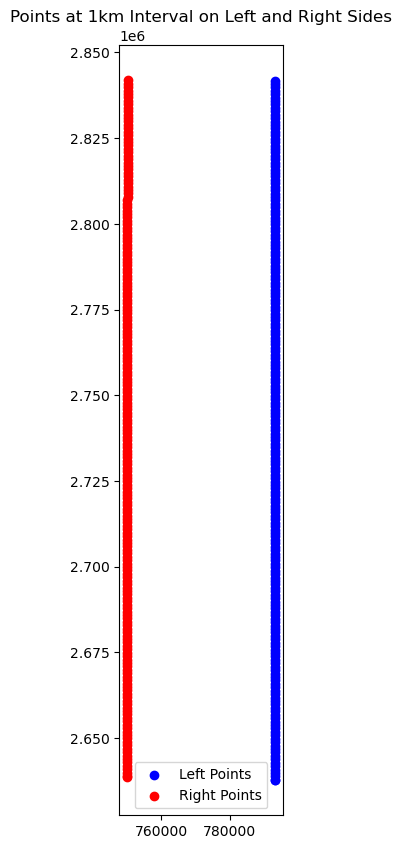

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefiles for points on the left and right side
left_points = gpd.read_file("D:/BUET/Thesis/ArcGIS/Cross_Section/Pints_1km_left.shp")
right_points = gpd.read_file("D:/BUET/Thesis/ArcGIS/Cross_Section/Pints_1km_right.shp")

# Display the points by plotting them
fig, ax = plt.subplots(figsize=(10, 10))
left_points.plot(ax=ax, color='blue', label='Left Points')
right_points.plot(ax=ax, color='red', label='Right Points')
plt.legend()
plt.title("Points at 1km Interval on Left and Right Sides")
plt.show()

In [8]:
# Sort both datasets by index or a specific column if necessary
left_points = left_points.sort_index()
right_points = right_points.sort_index()

# Determine the smaller number of points to avoid unmatched pairs
min_length = min(len(left_points), len(right_points))

# Create a GeoDataFrame to store the lines
lines = []

for left_point, right_point in zip(left_points.geometry[:min_length], right_points.geometry[:min_length]):
    # Create a LineString between corresponding points
    line = LineString([left_point, right_point])
    lines.append(line)

# Convert the lines into a GeoDataFrame
lines_gdf = gpd.GeoDataFrame(geometry=lines, crs=left_points.crs)

# Save the lines as a new shapefile
lines_gdf.to_file("D:/BUET/Thesis/ArcGIS/Cross_Section/cross_section_1km.shp")

print("Lines have been successfully saved to output_lines.shp.")

Lines have been successfully saved to output_lines.shp.


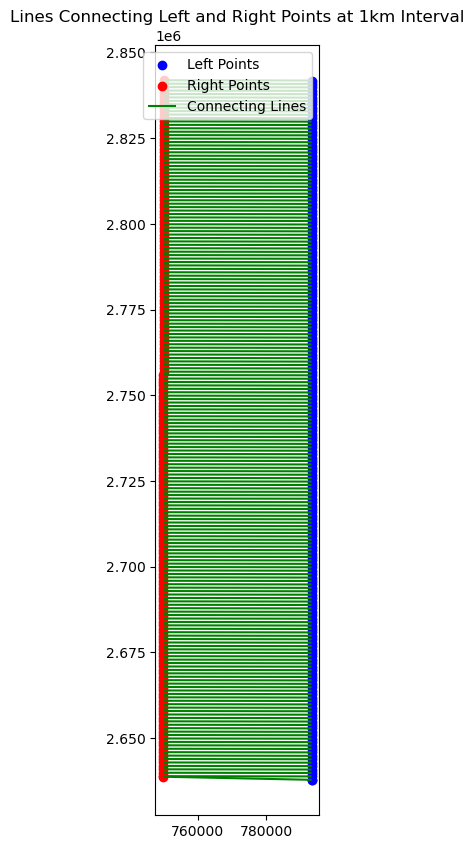

In [9]:
# Display the output
fig, ax = plt.subplots(figsize=(10, 10))
left_points.plot(ax=ax, color='blue', marker='o', label='Left Points')
right_points.plot(ax=ax, color='red', marker='o', label='Right Points')
lines_gdf.plot(ax=ax, color='green', label='Connecting Lines')

plt.legend()
plt.title("Lines Connecting Left and Right Points at 1km Interval")
plt.show()
